In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import gensim as gs
import re
import string
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier


 Configuração para GPU

In [5]:
devices = tf.config.experimental.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(devices[0], True)
    print("Success")
except:
    print("Exception occured")
    pass

Exception occured


In [6]:
df = pd.read_csv('../data/pre-processed.csv')
df = df.drop(columns=['index'])
df.isnull().any()

label                False
preprocessed_news    False
dtype: bool

In [7]:

stop_words = set(stopwords.words('portuguese'))

def remover_stop_words(news):
    palavras = news.split()
    palavras_sem_stop = [palavra for palavra in palavras if palavra.lower() not in stop_words]
    return ' '.join(palavras_sem_stop)

def review_cleaning(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df["preprocessed_news"] = df["preprocessed_news"].apply(remover_stop_words)
df["preprocessed_news"] = df["preprocessed_news"].apply(review_cleaning)

In [8]:
df['label'] = df.apply(lambda row: 0 if row.label == 'fake' else 1, axis=1)

X = df.drop(['label'], axis = 1)
Y = df['label']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, stratify=Y)

X_train = X_train['preprocessed_news'].apply(lambda x: x.lower())
X_test = X_test['preprocessed_news'].apply(lambda x: x.lower())


vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()


In [16]:

decisionTree = DecisionTreeClassifier(random_state=0, criterion="entropy",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=0)

X_test
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       779
           1       0.95      0.84      0.89      1021

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.90      0.89      0.89      1800



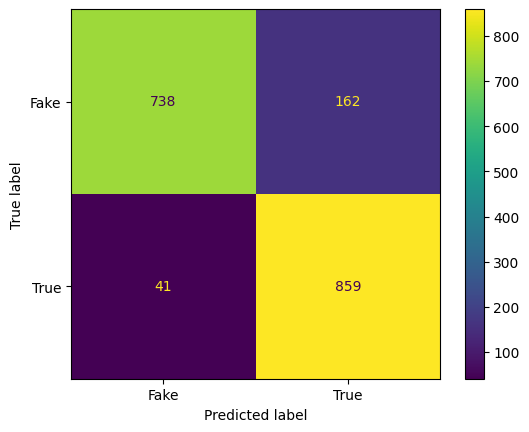

In [17]:
x_test_pred = decisionTree.predict(X_test)
print('X_test')
print(classification_report(x_test_pred,y_test))


x_test_pred = (x_test_pred > 0.75)
cm = confusion_matrix(y_test, x_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','True']).plot()

